<a href="https://colab.research.google.com/github/shravanisorte2003/ML-and-DL/blob/main/Diabetes_Disease_Prediction_Using_Machine_Learning_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = pd.read_csv('diabetes.csv')

In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.shape

(768, 9)

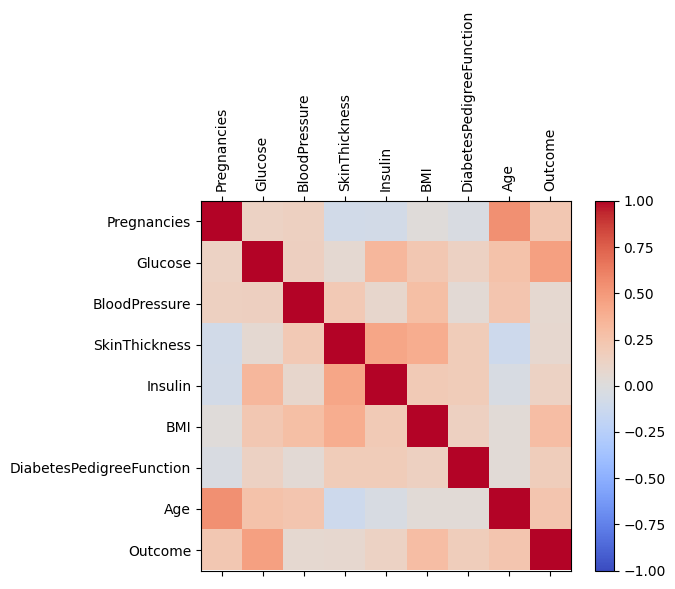

In [ ]:
corr = dataset.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dataset.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset.columns)
ax.set_yticklabels(dataset.columns)
plt.show()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Features

<Axes: xlabel='Outcome', ylabel='count'>

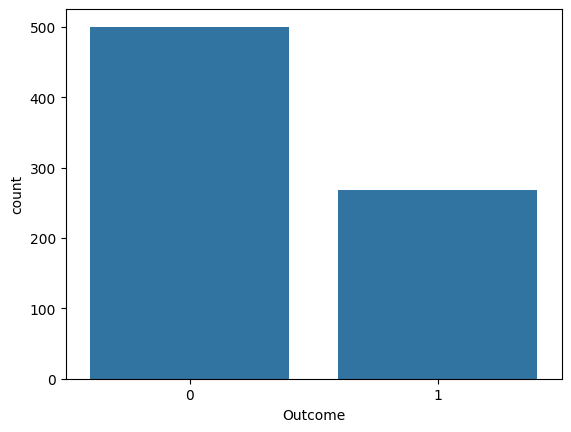

In [ ]:
sns.countplot(x = 'Outcome',data = dataset)

In [ ]:
pip install itertools

ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools


ValueError: Number of rows must be a positive integer, not 4.0

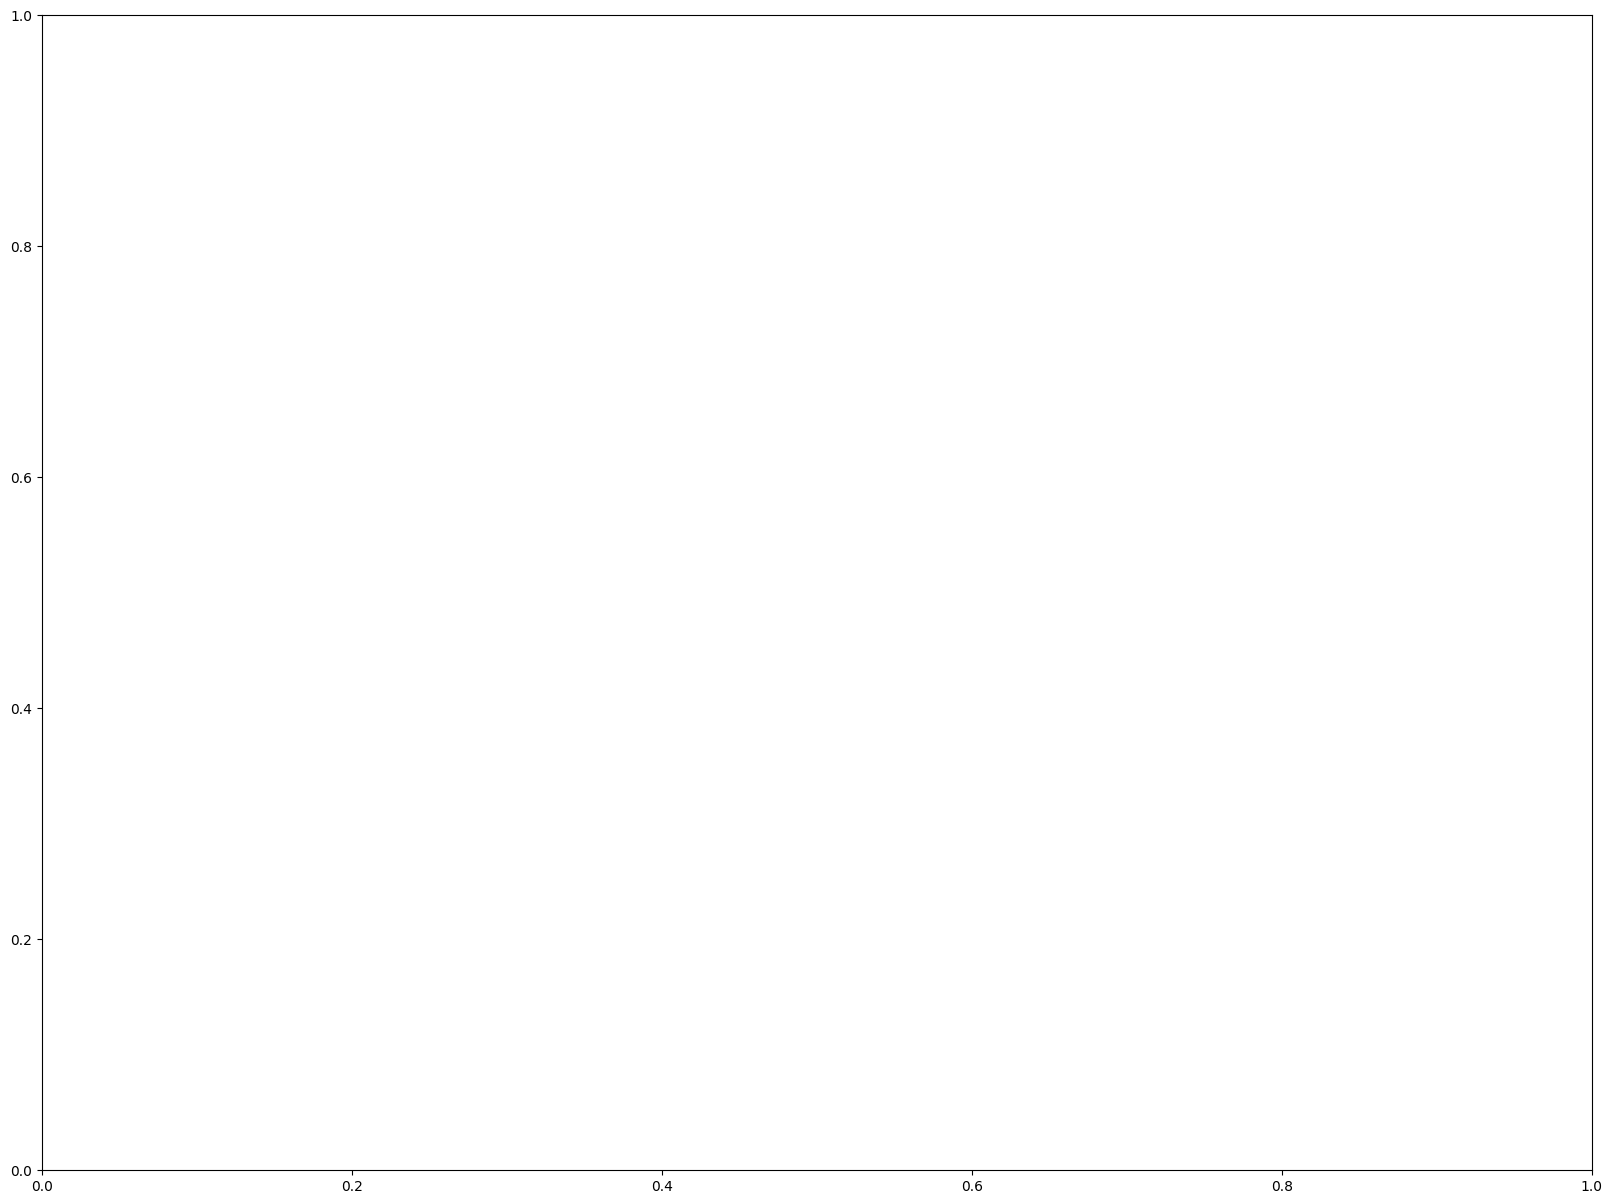

In [ ]:
import itertools

col = dataset.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dataset[i].hist(bins = 20)
    plt.title(i)
plt.show()

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize = (20, 20));

In [ ]:
sns.pairplot(data = dataset, hue = 'Outcome')
plt.show()

In [ ]:
sns.heatmap(dataset.corr(), annot = True)
plt.show()

# Data Preprocessing

In [ ]:
dataset_new = dataset

In [ ]:
dataset_new.isnull().sum()

# Recursive Partition Algorithm

In [ ]:
x = dataset.drop(columns=['Outcome'])
y = dataset['Outcome']
X = dataset['Age']

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)

In [ ]:
tree.plot_tree(clf)

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

# Principal Component Analysis

# Data scaling
PCA requires scaling/normalization of the data to work properly

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
dataset

In [ ]:
X = dataset.drop(columns=['Outcome'])
y = dataset['Outcome']

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
dfx = pd.DataFrame(data=X,columns=dataset.columns[0:8])

In [ ]:
dfx.head(10)

In [ ]:
dfx.describe()

# PCA class import and analysis

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=None)

In [ ]:
dfx_pca = pca.fit(dfx)

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()


In [ ]:
dfx_trans = pca.transform(dfx)

In [ ]:
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=dataset['Outcome'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

# Accuracy, Sensitivity, and Specificity evaluation with respect to attribute set

# A1, A2, A3, A4

In [ ]:
X = dfx_trans.iloc[:,[0,1,2,3]].values
Y = dataset.iloc[:,8].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
gnb = KNeighborsClassifier(n_neighbors=100)
gnb.fit(X_train, y_train)

In [ ]:
evaluate(gnb, X_train, X_test, y_train, y_test)

# A1, A2, A3, A4,A6

In [ ]:
X = dfx_trans.iloc[:,[0,1,2,3,5]].values
Y = dataset.iloc[:,8].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [ ]:

gnb.fit(X_train, y_train)

In [ ]:
evaluate(gnb, X_train, X_test, y_train, y_test)

# A1, A2, A3, A4,A5, A6

In [ ]:
X = dfx_trans.iloc[:,[0,1,2,3,4,5]].values
Y = dataset.iloc[:,8].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [ ]:

gnb.fit(X_train, y_train)

In [ ]:
evaluate(gnb, X_train, X_test, y_train, y_test)

# A2, A4, A5, A6,A8

In [ ]:
X = dfx_trans.iloc[:,[1,3,4,5,7]].values
Y = dataset.iloc[:,8].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [ ]:

gnb.fit(X_train, y_train)

In [ ]:
evaluate(gnb, X_train, X_test, y_train, y_test)

# A1, A2, A3, A7

In [ ]:
X = dfx_trans.iloc[:,[0,1,2,6]].values
Y = dataset.iloc[:,8].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

gnb.fit(X_train, y_train)

In [ ]:
evaluate(gnb, X_train, X_test, y_train, y_test)

# A1, A2, A3, A4,A5, A6, A7, A8

In [ ]:
X = dfx_trans.iloc[:,[0,1,2,3,4,5,6,7]].values
Y = dataset.iloc[:,8].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

gnb.fit(X_train, y_train)

In [ ]:
evaluate(gnb, X_train, X_test, y_train, y_test)

# Full attribute set

In [ ]:
X = dfx_trans.values
Y = dataset.iloc[:,8].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

gnb.fit(X_train, y_train)

In [ ]:
evaluate(gnb, X_train, X_test, y_train, y_test)

# A8

In [ ]:
X = dfx_trans.iloc[:,[7]].values
Y = dataset.iloc[:,8].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

gnb.fit(X_train, y_train)

In [ ]:
evaluate(gnb, X_train, X_test, y_train, y_test)

# A7,A8

In [ ]:
X = dfx_trans.iloc[:,[6,7]].values
Y = dataset.iloc[:,8].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

gnb.fit(X_train, y_train)

In [ ]:
evaluate(gnb, X_train, X_test, y_train, y_test)

# A6,A7,A8

In [ ]:
X = dfx_trans.iloc[:,[5,6,7]].values
Y = dataset.iloc[:,8].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

gnb.fit(X_train, y_train)

In [ ]:
evaluate(gnb, X_train, X_test, y_train, y_test)

# A5,A6,A7,A8

In [ ]:
X = dfx_trans.iloc[:,[4,5,6,7]].values
Y = dataset.iloc[:,8].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

gnb.fit(X_train, y_train)

In [ ]:
evaluate(gnb, X_train, X_test, y_train, y_test)

# A4,A5,A6,A7,A8

In [ ]:
X = dfx_trans.iloc[:,[3,4,5,6,7]].values
Y = dataset.iloc[:,8].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

gnb.fit(X_train, y_train)

In [ ]:
evaluate(gnb, X_train, X_test, y_train, y_test)

# A3,A4,A5,A6,A7,A8

In [ ]:
X = dfx_trans.iloc[:,[2,3,4,5,6,7]].values
Y = dataset.iloc[:,8].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

gnb.fit(X_train, y_train)

In [ ]:
evaluate(gnb, X_train, X_test, y_train, y_test)

# A2,A3,A4,A5,A6,A7,A8

In [ ]:
X = dfx_trans.iloc[:,[1,2,3,4,5,6,7]].values
Y = dataset.iloc[:,8].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

gnb.fit(X_train, y_train)

In [ ]:
evaluate(gnb, X_train, X_test, y_train, y_test)

# Data Modelling

# Naïve Bayes

In [ ]:
x = dfx_trans.values
y = dataset.iloc[:,8].values

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

In [ ]:
gnb.fit(x_train, y_train)

In [ ]:
evaluate(gnb, x_train, x_test, y_train, y_test)

In [ ]:
y_pred_gnb = gnb.predict(x_test)
cm = confusion_matrix(y_test, y_pred_gnb)
cm
gnb_result = accuracy_score(y_test,y_pred_gnb)
print("Accuracy :",gnb_result)
recall_gnb = cm[0][0]/(cm[0][0] + cm[0][1])
precision_gnb = cm[0][0]/(cm[0][0]+cm[1][1])
recall_gnb,precision_gnb

# SVM

In [ ]:
from sklearn import svm
svm = svm.SVC()

In [ ]:
svm.fit(x_train, y_train)

In [ ]:
evaluate(svm, x_train, x_test, y_train, y_test)

In [ ]:
y_pred_svm = svm.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)
cm
from sklearn.metrics import accuracy_score
svm_result = accuracy_score(y_test,y_pred_svm)
print("Accuracy :",svm_result)
recall_svm = cm[0][0]/(cm[0][0] + cm[0][1])
precision_svm = cm[0][0]/(cm[0][0]+cm[1][1])
recall_svm,precision_svm

# Decision Tree

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()

In [ ]:
dt.fit(x_train, y_train)

In [ ]:
evaluate(dt, x_train, x_test, y_train, y_test)

In [ ]:
y_pred_dt = dt.predict(x_test)
cm = confusion_matrix(y_test, y_pred_dt)
cm
dt_result = accuracy_score(y_test,y_pred_dt)
print("Accuracy :",dt_result)
recall_dt = cm[0][0]/(cm[0][0] + cm[0][1])
precision_dt = cm[0][0]/(cm[0][0]+cm[1][1])
recall_dt,precision_dt

# Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
RF.fit(x_train, y_train)

In [ ]:
evaluate(RF, x_train, x_test, y_train, y_test)

In [ ]:
y_pred_rf = RF.predict(x_test)
cm = confusion_matrix(y_test, y_pred_rf)
cm
rf_result = accuracy_score(y_test,y_pred_rf)
print("Accuracy :",rf_result)
recall_rf = cm[0][0]/(cm[0][0] + cm[0][1])
precision_rf = cm[0][0]/(cm[0][0]+cm[1][1])
recall_rf,precision_rf

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN= KNeighborsClassifier(n_neighbors=100)
from sklearn.model_selection import cross_val_score

In [ ]:
KNN.fit(x_train, y_train)

In [ ]:
evaluate(KNN, x_train, x_test, y_train, y_test)

In [ ]:
y_pred_knn = KNN.predict(x_test)
cm = confusion_matrix(y_test, y_pred_knn)
cm
knn_result = accuracy_score(y_test,y_pred_knn)
print("Accuracy :",knn_result)
recall_knn = cm[0][0]/(cm[0][0] + cm[0][1])
precision_knn = cm[0][0]/(cm[0][0]+cm[1][1])
recall_knn,precision_knn

# Model Comparsion

In [ ]:
results ={'Accuracy': [svm_result*100,rf_result*100,dt_result*100,knn_result*100,gnb_result*100],
 'Recall':[recall_svm*100,recall_rf*100,recall_dt*100,recall_knn*100,recall_gnb*100],
 'Precision': [precision_svm*100,precision_rf*100,precision_dt*100,precision_knn*100,precision_gnb*100]}
index = ['Suport Vector Machine','Random Forest','Decision Tree','KNNeighbors','Naive Bayes Classifier']

In [ ]:
results =pd.DataFrame(results,index=index)

In [ ]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(19,19)).get_figure()
fig.savefig('Final Result.png')

In [ ]:
results.plot(subplots=True,kind ='bar',figsize=(4,10))